In [23]:
import geopandas
import pandas as pd
import json
import re
import matplotlib as mplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
import math

In [47]:
world = geopandas.read_file('world')
# europe = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# europe = geopandas.read_file('countries/european-union-countries.shp')
# europe[europe.NAME == 'Greece']
europe= world[world.REGION == 150]

In [8]:
data= pd.read_excel("gender-equality-index-2005-2010-2012-2015.xlsx", sheet_name='2015', header=1)[:29]

data=data.replace({'Country': 'UK'}, 'GB')
data=data.replace({'Country': 'EL'}, 'GR')

/home/pawel/.virtualenvs/analys/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/home/pawel/.virtualenvs/analys/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/pawel/.virtualenvs/analys/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

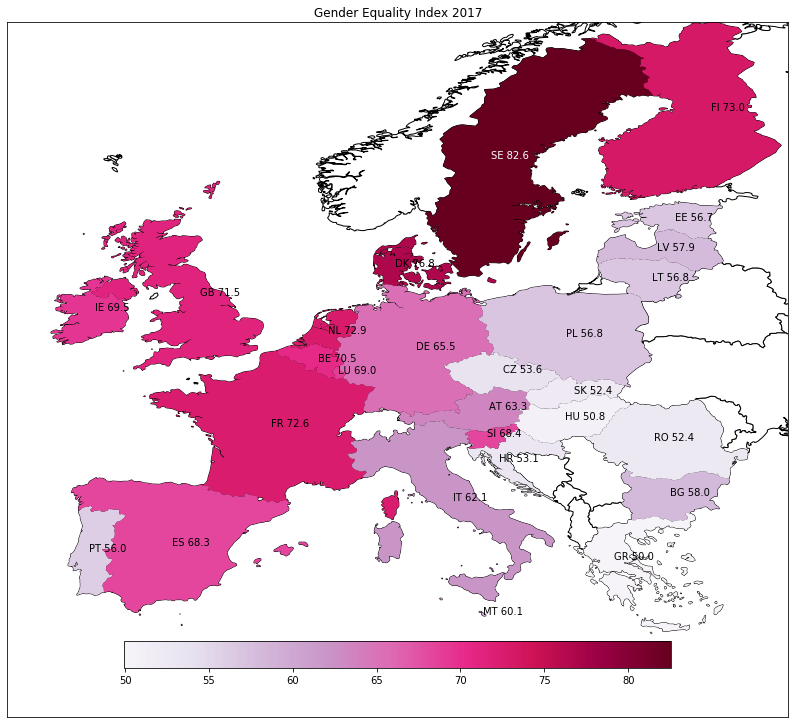

In [46]:
c_map = 'PuRd'
base = europe.plot(color='white', edgecolor='black', figsize=(14, 14))

mplot.pyplot.xlim(-13,32)
mplot.pyplot.ylim(30, 70)
europe = europe[europe.ISO2.isin(data.Country)]

def func(x):
    country_data = data[data.Country == x]
    if len(country_data) != 0:
        return country_data["Gender Equality Index"].iloc[0]

europe['gender_index'] = europe.ISO2.apply(func)
europe['coords'] = europe['geometry'].apply(lambda x: x.representative_point().coords[:])
europe['coords'] = [coords[0] for coords in europe['coords']]

plt = europe.plot(ax=base, column='gender_index', cmap=c_map, label='Gender equality index', figsize=(14, 14))
sm = mplot.cm.ScalarMappable(cmap=c_map,  norm=mplot.colors.Normalize(vmin=europe.gender_index.min(), vmax=europe.gender_index.max()))
sm._A = []
fig = plt.get_figure()
plt.set_title("Gender Equality Index 2017")
plt.get_xaxis().set_visible(False)
plt.get_yaxis().set_visible(False)
#cax = fig.add_axes((0.7, 0.25, 0.04, 0.5))
#cbaxes = fig.add_axes([0.1, 0.1, 0.03, 0.8])

fig.colorbar(sm, ax=fig.gca(),orientation='horizontal', shrink=0.7, pad=-0.1) #cax=cax)
for idx, row in europe.iterrows():
    kwargs = {}
    gindex = row['gender_index']

    if not math.isnan(gindex):
        
        if row['gender_index'] > 80:
            kwargs['color'] = 'white'
        plt.annotate(s= row['ISO2'] + " " + str(round(row['gender_index'], 1)), xy=row['coords'], **kwargs)
mplot.pyplot.savefig('file.png', pad_inches=0,  bbox_inches='tight')